In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("casas.csv")
df

,Terreno (m2),Precio (MDP)
0,440.0,1.01
1,616.0,1.42
2,381.0,0.88
3,963.0,2.21
4,431.0,0.99
5,255.0,0.59
6,594.0,1.37
7,625.0,1.44
8,708.0,1.63
9,468.0,1.08


In [3]:
x = df['Terreno (m2)'].values
y = df['Precio (MDP)'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle= True, random_state=0)

In [4]:
def BGD(x, y, x_test, y_test, iters, alpha, weight):
    wi = 0
    sumA = 0
    preds = []  
    errors = []
    wi_values = []   
    
    for _ in range(iters):
        for j in range(len(x)):
            sumA += ((wi * x[j]) - y[j]) * x[j]
        wi = wi - alpha * (2 * sumA)
        wi = wi - weight
        weight = wi
        y_pred = [np.dot(xi,wi) for xi in x_test]
        preds.append(y_pred)
        error = sum(abs((y_pred[k] - y_test[k])) for k in range(len(y_test)))
        errors.append(error)
        wi_values.append(wi)


    return preds, errors, wi_values


iters = 4
alpha = 0.00000007
weight = 0.0
preds, errors, wi_values = BGD(x_train, y_train, x_test, y_test, iters, alpha, weight)
BGD(x_train, y_train, x_test, y_test, iters, alpha, weight)

([[0.3102798468, 0.5765830223999999, 0.35099898679999997],
  [0.5107482737671498, 0.9491070284176958, 0.5777756062825239],
  [0.6402687393247717, 1.1897907281940638, 0.7242935082650304],
  [0.7239505003484762, 1.3452938431672472, 0.8189571276907959]],
 [2.262138144, 1.4623690915326304, 0.945647024216134, 0.6117985287934806],
 [0.0008143827999999999,
  0.00134054665030748,
  0.001680495378805175,
  0.0019001325468463942])

In [5]:
def regresion_plot(x_test, preds, y_test, iterations):
    plt.figure(figsize=(10, 6))
    for i in range(iterations):
        plt.plot(x_test, preds[i], label=f'Iteración {i+1}')
    plt.scatter(x_test, y_test, color='red')
    plt.title('Regresión Lineal')
    plt.xlabel('Terreno (m2)')
    plt.ylabel('Precio (MDP)')
    plt.legend()
    plt.show()

def error_plot(errors, iterations):
    plt.figure(figsize=(10, 6))
    plt.scatter(np.arange(1, iterations + 1), errors, color='red')
    plt.title('Error de Estimación')
    plt.xlabel('Iteración')
    plt.ylabel('Error')
    plt.show()

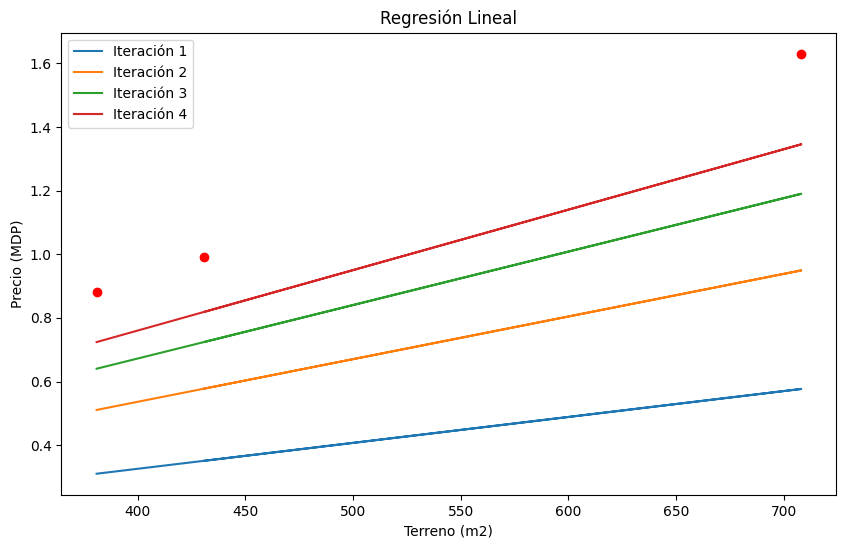

In [6]:
regresion_plot(x_test, preds, y_test, iters)

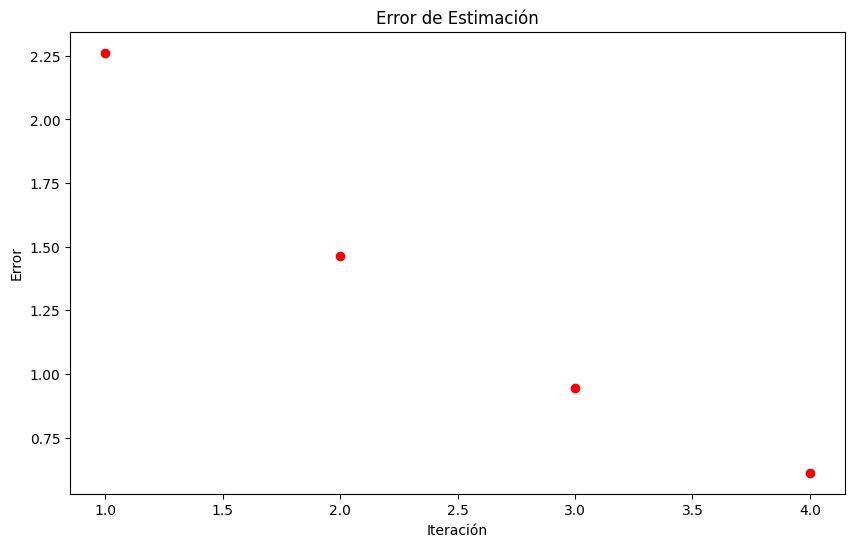

In [7]:
error_plot(errors, iters)

In [8]:
df2 = pd.read_csv('Dataset_multivariable.csv')
df2

,x1,x2,x3,x4,x5,y
0,1.0,0.4,-12.0,12.0,10.2,11.6
1,1.0,0.6,-15.0,16.0,11.9,14.5
2,1.0,0.8,-18.0,20.0,13.6,17.4
3,1.0,1.0,-21.0,24.0,15.3,20.3
4,1.0,1.2,-24.0,28.0,17.0,23.2
5,1.0,1.4,-27.0,32.0,18.7,26.1
6,1.0,1.6,-30.0,36.0,20.4,29.0
7,1.0,1.8,-33.0,40.0,22.1,31.9
8,1.0,2.0,-36.0,44.0,23.8,34.8
9,1.0,2.2,-39.0,48.0,25.5,37.7


In [9]:
x = df2[['x1', 'x2', 'x3', 'x4', 'x5']].values
y = df2['y'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle= True, random_state=0)


In [10]:
def approximation_Error(x_test, y_test, weightVector):
    approximationM = 0
    numberRows = x_test.shape[0]
    yEstimatedVector = []
    yRealVector = []
    for i in range(numberRows):
        yEstimated = np.dot(x_test[i], weightVector)
        yEstimatedVector.append(yEstimated)
        yReal = y_test[i] 
        yRealVector.append(yReal)
        approximationM += abs(yReal - yEstimated)
    return approximationM, yEstimatedVector, yRealVector



def request_Weights():
    weightVector = [0, 0, 0, 0, 0]
    for i in range(5):
        currentWeightDisplay = 'w' + str(i)
        wi = int(input('Ingresar peso {}:'.format(currentWeightDisplay)))
        weightVector[i] = wi
    return weightVector


def bgd(x_train, y_train, x_test, y_test, iterations):
    alpha = float(input('Ingresar el alpha:'))
    weightVector = request_Weights()
    vectorError = []
    vectorWeights = []
    vectorEsimated = []
    vectorReal = []
    for _ in range(iterations):
        for i, wi in enumerate(weightVector):
            sum = np.dot((wi * x_train[:, i] - y_train), x_train[:, i])
            wi = wi - 2 * alpha * sum
            weightVector[i] = wi
        results = approximation_Error(x_test, y_test, weightVector)
        vectorWeights.append(weightVector.copy())
        vectorError.append(results[0])
        vectorEsimated.append(results[1])
        vectorReal.append(results[2])

    return vectorWeights, vectorError, vectorEsimated, vectorReal



def imprimir(vector, message):
    print(message)
    for i, v in enumerate(vector):
        print('Iteración {}:{}'.format(i, v))




iterations = int(input('Ingresar el número de iteraciones:'))
weights, train_errors, estimated, real = bgd(x_train, y_train, x_test, y_test, iterations)

imprimir(weights, 'w')
imprimir(real, 'y_test')
imprimir(estimated, 'y_pred')
imprimir(train_errors, 'Error de aproximación')

w
Iteración 0:[0.3422, 0.51388, -9.7614, 11.6464, 6.694940000000001]
Iteración 1:[0.6796092, 1.0132480288, 79.0478172, -144.41536, -18.53494139]
Iteración 2:[1.0122946712, 1.4985139044666882, -728.9384408855999, 1946.8122239999998, 76.543866628215]
Iteración 3:[1.3403225458032, 1.970075871804549, 6622.120535177188, -26075.637401599997, -281.76062138842826]
Iteración 4:[1.6637580301619552, 2.4283209291847885, -60257.81402904206, 349425.18758143997, 1068.5098417022919]
Iteración 5:[1.9826654177396879, 2.87362514614461, 548215.8306362247, -4682285.867191296, -4019.984398455087]
Iteración 6:[2.2971081018913324, 3.306353972017486, -4987677.388528372, 62742642.266763374, 15156.006145577994]
Iteración 7:[2.6071485884648538, 3.7268625358477125, 45377879.11943114, -840751394.7282293, -57108.71421961067]
Iteración 8:[2.912848508226346, 4.1354959378353735, -412847953.9899845, 11266068701.004673, 215220.88447660283]
Iteración 9:[3.214268629111177, 4.532589532550903, 3756090675.6394796, -1509653205

In [11]:
def BGDGOD(x, y, x_test, y_test, iters, alpha, weight):
    w = [0] * len(x[0]) 
    preds = []
    errors = []

    for _ in range(iters):
        for i in range(len(x)):
            y_pred = np.dot(x[i],weight)
            for j in range(len(w)):
                w[j] = w[j] - alpha * (2* (y_pred - y[i]) * x[i][j])
        y_pred_test = [np.dot(xi,w) for xi in x_test]
        preds.append(y_pred_test)
        error = sum(abs(y_pred_test[k] - y_test[k]) for k in range(len(y_test)))
        errors.append(error)

    return preds, errors

iters = 4
alpha = 0.000006
weight = [0, 0, 0, 0, 0]
preds, errors = BGDGOD(x_train, y_train, x_test, y_test, iters, alpha, weight)
BGDGOD(x_train, y_train, x_test, y_test, iters, alpha, weight)

([[3.002626128, 6.147369192, 4.050873816],
  [6.005252256, 12.294738384000002, 8.101747632],
  [9.007878384000001, 18.442107576, 12.152621448000001],
  [12.010504512, 24.589476768000004, 16.203495264]],
 [62.199130864, 48.99826172799999, 35.797392591999994, 22.59652345599999])

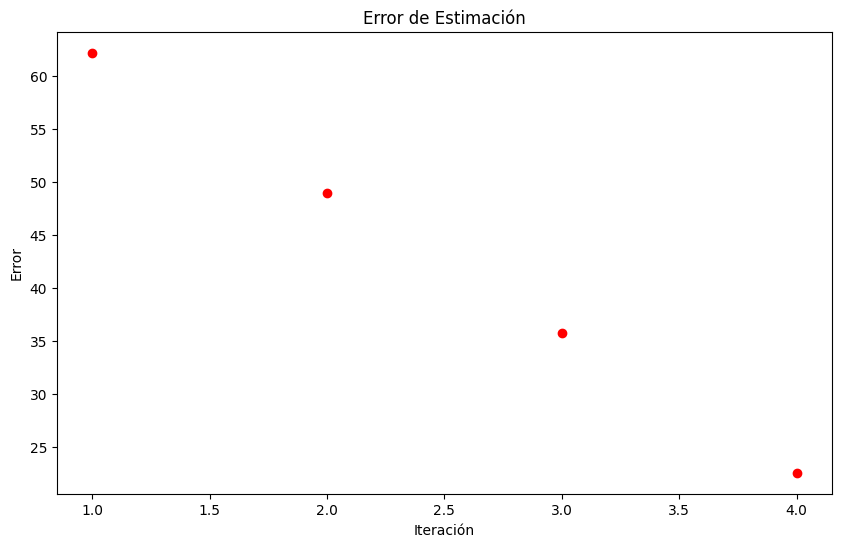

In [12]:
error_plot(errors, iterations)